In [166]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score #mede a acurácia 

# Importando o Dataset

Para a realização desse trabalho, foi fornecido 3 datasets, sendo eles o conjunto de treino - 'train_data.csv' e o conjunto de teste dividido em 2 partes - 'test_data.csv' (features) e 'sample_submission.csv'(exemplo de submissão das Labels) 

In [167]:
#importando os dados de treino
trainOriginal = pd.read_csv("../input/adult-pmr3508/train_data.csv", index_col=['Id'], na_values="?")
#importando os dados de teste para as features
testFeaturesOriginal = pd.read_csv("../input/adult-pmr3508//test_data.csv", index_col=['Id'],  na_values="?")
#importando os dados de exemplo de teste para a label
testSampleLabelOriginal = pd.read_csv("../input/adult-pmr3508/sample_submission.csv", index_col=['Id'],  na_values="?")

In [168]:
#Criar cópia dos datasets originais
train = trainOriginal.copy()
testFeatures = testFeaturesOriginal.copy()
testSampleLabel = testSampleLabelOriginal.copy()

In [169]:
train.head() # visão das 5 primeiras linhas do dataset

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
Id,,,,,,,,,,,,,,,
16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K


In [170]:
testFeatures.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
Id,,,,,,,,,,,,,,
0,25,Private,120596,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,44,United-States
1,64,State-gov,152537,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
2,31,Private,100135,Masters,14,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States
3,45,Private,189123,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States
4,64,Self-emp-inc,487751,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States


In [171]:
testSampleLabel.head()

,income
Id,
0,>50K
1,<=50K
2,>50K
3,>50K
4,<=50K


In [172]:
train.isnull().sum() # verificando se há dados faltantes("?")

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

Para a maioria dos dados, não temos dados nulos. Porém, nas features 'workclass', 'occupation' e 'native.country', temos alguns dados faltantes que serão tratados mais a frente 

In [173]:
train.describe() # algumas analises descritivas das variáveis 

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Aqui já vemos um problema, 'capital.gain' e 'capital.loss' tem pelo menos 75%(até o terceiro quartil) de dados iguais a 0. Vendo a porcentagem de dados iguais a 0 nessas variáveis, temos:

In [174]:
equalsZeroGain = train['capital.gain'].value_counts()[0]/len(train['capital.gain'])
equalsZeroLoss = train['capital.loss'].value_counts()[0]/len(train['capital.loss'])

print("Capital Gain - O total de ocorrencias iguais à 0 (porcentagem) é " + str(equalsZeroGain))
print("Capital Loss - O total de ocorrencias iguais à 0 (porcentagem) é " + str(equalsZeroLoss))

Capital Gain - O total de ocorrencias iguais à 0 (porcentagem) é 0.9167383292383292
Capital Loss - O total de ocorrencias iguais à 0 (porcentagem) é 0.9533476658476658


# Entendendo o Conjunto de Dados 

## Do que se trata cada variável

### age 

* **Definição:** A idade de um indivíduo

* **Tipo:** Inteiro maior que zero

<AxesSubplot:xlabel='age'>

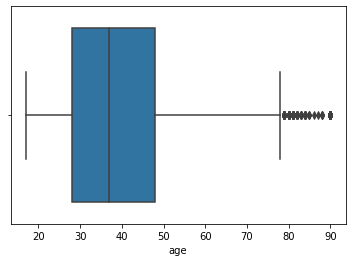

In [175]:
sns.boxplot(x=train["age"])

### fnlwgt

* **Definição:** É um peso atribuído pelo Census Bureau. A ideia é que, se duas amostras têm o mesmo (ou similar) fnlwgt, elas têm características semelhantes, demograficamente falando. Digamos que as amostras 7,12 e 33 tenham valores de fnlwgt semelhantes, é mais provável que sejam da mesma raça, formação educacional e social semelhantes, etc. não padronizado em diferentes estados. Assim, alguém na Califórnia pode compartilhar fnlwgt semelhante com alguém em Dakota do Norte, mas pode ter uma formação socioeconômica totalmente diferente.

* **Tipo:** Inteiro maior que 0

<AxesSubplot:xlabel='fnlwgt'>

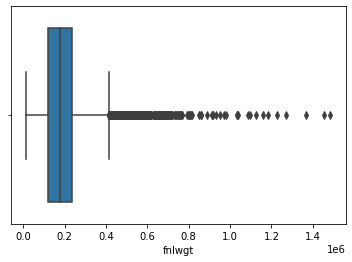

In [176]:
sns.boxplot(x=train["fnlwgt"])

### education

* **Definição:** O nível mais alto de educação que o indivíduo alcançou

* **Tipo:** Categorica, dividida em:
    * Bachelors, 
    * Some college, 
    * 11th, 
    * HS grad, 
    * Prof school, 
    * Assoc acdm, 
    * Assoc voc,
    * 9th, 
    * 7th 8th, 
    * 12th, 
    * Masters, 
    * 1st 4th, 
    * 10th, 
    * Doctorate, 
    * 5th 6th, 
    * Preschool.

<AxesSubplot:>

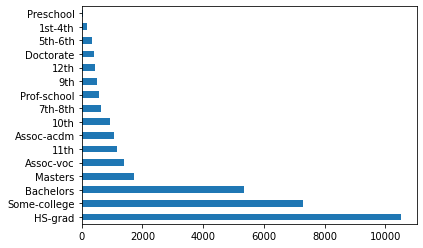

In [177]:
train['education'].value_counts().plot(kind = 'barh') #horizontal bar plot

In [178]:
train.education.describe()

count       32560
unique         16
top       HS-grad
freq        10501
Name: education, dtype: object

### education.num

* **Definição:** O nível mais alto de educação que o indivíduo alcançou em forma numérica

* **Tipo:** Inteiro maior que 0

<AxesSubplot:xlabel='education.num'>

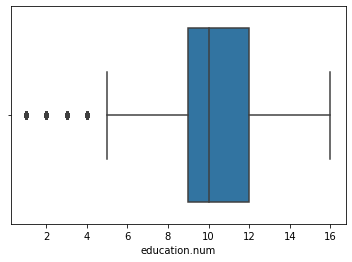

In [179]:
sns.boxplot(x=train["education.num"])

### marital.status

* **Definição:** O estado civil de um indivíduo

* **Tipo:** Categorica, dividida em:
    * Married civ spouse, 
    * Divorced, 
    * Never married, 
    * Separated, 
    * Widowed,
    * Married spouse absent, 
    * Married AF spouse.

<AxesSubplot:>

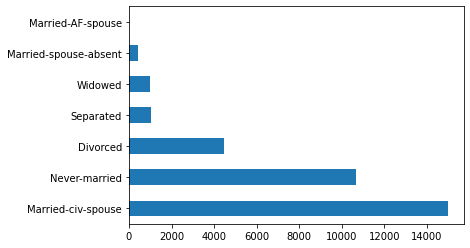

In [180]:
train["marital.status"].value_counts().plot(kind = 'barh') #horizontal bar plot

### occupation

* **Definição:** O tipo geral de ocupação do indivíduo

* **Tipo:** Categorica, dividida em:
    * Tech support, 
    * Craft repair, 
    * Other service, 
    * Sales, 
    * Exec managerial,
    * Prof specialty, 
    * Handlers cleaners, 
    * Machine op inspct, 
    * Adm clerical,
    * Farming fishing, 
    * Transport moving, 
    * Priv house serv, 
    * Protective serv,
    * Armed Forces

<AxesSubplot:>

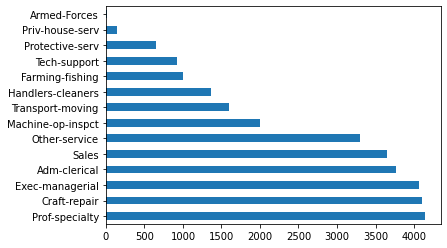

In [181]:
train["occupation"].value_counts().plot(kind = 'barh') #horizontal bar plot

### relationship

* **Definição:** Representa o que esse indivíduo é em relação à outros

* **Tipo:** Categorica, dividida em:
    * Wife, 
    * Own child, 
    * Husband, 
    * Not in family, 
    * Other relative, 
    * Unmarried.

<AxesSubplot:>

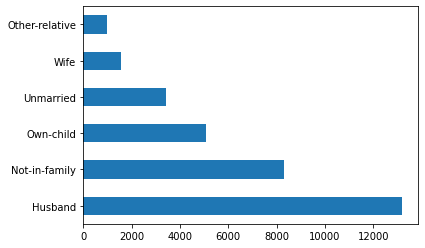

In [182]:
train["relationship"].value_counts().plot(kind = 'barh') #horizontal bar plot

### Race 

* **Definição:** Descrição racial de um individuo

* **Tipo:** Categorica, dividida em:
    * White, 
    * Asian Pac Islander, 
    * Amer Indian Eskimo, 
    * Other, 
    * Black.

<AxesSubplot:ylabel='race'>

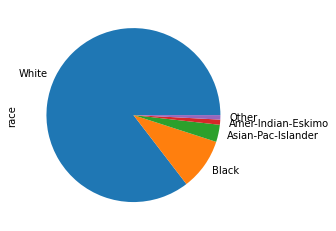

In [183]:
train["race"].value_counts().plot(kind = 'pie') #horizontal bar plot

In [184]:
train.groupby(['race']).size()/train.groupby(['race']).size().sum() # porcentagem de ocorrencias de cada pais para o número de ocorrências

race
Amer-Indian-Eskimo    0.009552
Asian-Pac-Islander    0.031910
Black                 0.095946
Other                 0.008323
White                 0.854269
dtype: float64

Vemos que cerca de 85% da população é branca, enquanto as outras etnias tem uma representatividade bem menor. Preto vem em seguida com 9.5%

### sex

* **Definição:** Sexo biológico de um indivíduo

* **Tipo:** Categorica, dividida em:
    * Male,
    * Female.

<AxesSubplot:ylabel='sex'>

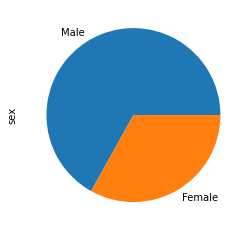

In [185]:
train["sex"].value_counts().plot(kind = 'pie') #horizontal bar plot

### capital.gain

* **Definição:** Ganho de capital

* **Tipo:** Inteiro maior que 0

<AxesSubplot:xlabel='capital.gain'>

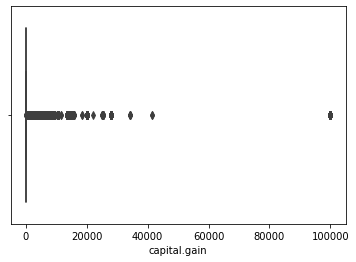

In [186]:
sns.boxplot(x=train["capital.gain"])

Note que os dados são muito esparsos

### capital.loss

* **Definição:** Perda de capital

* **Tipo:** Inteiro maior que 0

<AxesSubplot:xlabel='capital.loss'>

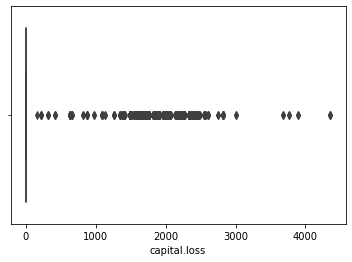

In [187]:
sns.boxplot(x=train["capital.loss"])

Mesma analise que gain, dados muito esparsos

### hours per week

* **Definição:** A quantidade de horas trabalhadas por semana

* **Tipo:** Continua

<AxesSubplot:xlabel='hours.per.week'>

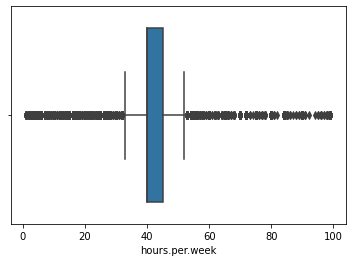

In [188]:
sns.boxplot(x=train["hours.per.week"])

A mediana está exatamente em 40, o que era esperado, enquanto há muitos outliers.

### native-country

* **Definição:** País de origem

* **Tipo:** Categorica, dividida em diversos países 

In [189]:
train.groupby(['native.country']).size()/train.groupby(['native.country']).size().sum() # porcentagem de ocorrencias de cada pais para o número de ocorrências

native.country
Cambodia                      0.000594
Canada                        0.003784
China                         0.002345
Columbia                      0.001845
Cuba                          0.002971
Dominican-Republic            0.002189
Ecuador                       0.000876
El-Salvador                   0.003315
England                       0.002815
France                        0.000907
Germany                       0.004284
Greece                        0.000907
Guatemala                     0.002001
Haiti                         0.001376
Holand-Netherlands            0.000031
Honduras                      0.000407
Hong                          0.000625
Hungary                       0.000407
India                         0.003127
Iran                          0.001345
Ireland                       0.000751
Italy                         0.002283
Jamaica                       0.002533
Japan                         0.001939
Laos                          0.000563
Mexico    

Podemos ver que quase 90% das observações são 'United-States' e que o restos são nacionalidades tem uma porcentagem minimas das observações. 

### income (label)

Por fim, temos a nossa label:

* **Definição:** Se o individuo ganha ou não mais que 50K

* **Tipo:** Categorica, dividida em:
    * ' <=50k ', 
    * ' >50k '


<AxesSubplot:ylabel='income'>

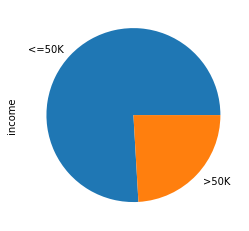

In [190]:
train["income"].value_counts().plot(kind = 'pie') #horizontal bar plot

Vamos transformar 'income' em binário somente para facilitar a visualização e possibilitar certas análises

In [191]:
i = 0
for income in train["income"]:
    
    if(income == ">50K" ):  train.iloc[i, train.columns.get_loc("income")] = 1 # se '>50K', 1
    else: train.iloc[i, train.columns.get_loc("income")] = 0 # se '<=50K', 0
  
    i += 1

# #transformar os valores para int
train['income'] = train['income'].astype('int')

train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
Id,,,,,,,,,,,,,,,
16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,0
16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,0
16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0
16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,1


## Correlação

In [192]:
#importa a função para fazer o heatmap
import numpy as np
import seaborn as sns

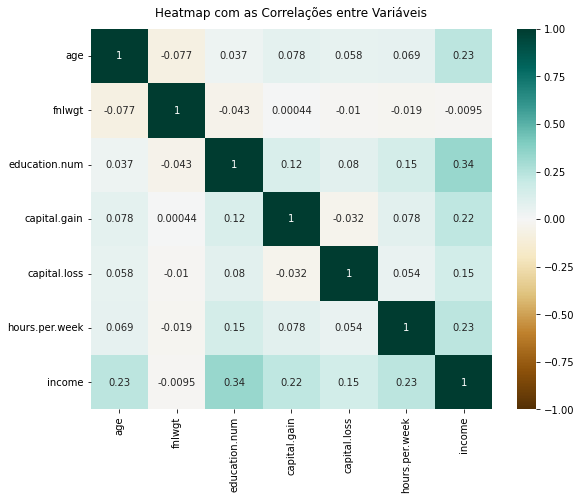

In [193]:
#heatmap com as correlações entre as variáveis
plt.figure(figsize=(9, 7))
heatmap = sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Heatmap com as Correlações entre Variáveis', fontdict={'fontsize':12}, pad=12);

Acima podemos ver a correlação de cada variavel em relação à todas as variáveis. Entretanto, o que mais nos interessa é a correlação das variáveis em relação ao income (primeira linha de cima para baixo), segue gráfico que "amplia" nossa visão dessa:

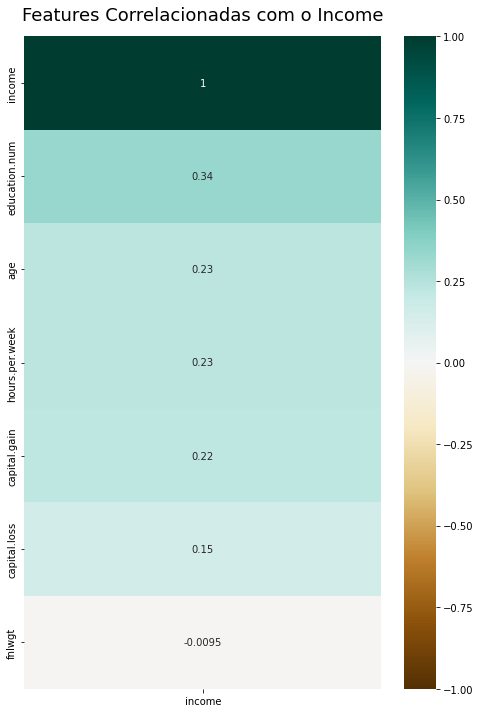

In [194]:
#Heatmap com as correlações das outras features numéricas em relação ao income
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr()[['income']].sort_values(by='income', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlacionadas com o Income', fontdict={'fontsize':18}, pad=16);

Como podemos ver, apenas fnlwgt é uma feature que não apresenta uma correlação minimamente significativa em relação ao income, por isso iremos remove-la mais a frente. As outras, mesmo as que tem correlação um pouco baixa, não se justifica remove-las apenas por esse motivo.

# Data Prep

## Removendo Duplicatas

### Removendo Observações Duplicadas

Vamos remover todas as observações que se repetem ao longo do dataset:

In [195]:
train.shape #shape antes da remoção

(32560, 15)

In [196]:
train = train.drop_duplicates()

In [197]:
train.shape #shape depois da remoção - poucas removidas

(32536, 15)

### Removendo Variáveis Duplicadas

Intuitivamente, as variáveis 'education' e 'education.num' parecem serem redundantes, já que ambas se referem a escolarização com a diferença de uma ser categorica e outra numérica. Dessa forma, foi feito um teste para verificar qual seria a diferença de cada categoria e o resultado foi o seguinte:

In [198]:
train["education"].value_counts()

HS-grad         10494
Some-college     7282
Bachelors        5352
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64

In [199]:
train["education.num"].value_counts()

9     10494
10     7282
13     5352
14     1722
11     1382
7      1175
12     1067
6       933
4       645
15      576
5       514
8       433
16      413
3       332
2       166
1        50
Name: education.num, dtype: int64

Logo, como podemos ver, as categorias das das duas variáveis são iguais e armazenam os mesmos dados. 

Dessa forma, podemos excluir uma delas. Por conta de variáveis númericas serem preferiveis a categoricas no Knn(evitamos mais tratamentos), foi excluido 'education'

In [200]:
train = train.drop('education', axis=1) # exclui a coluna 'education'
train.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
Id,,,,,,,,,,,,,,
16280,34,Private,204991,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,0
16281,58,Local-gov,310085,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
16282,25,Private,146117,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,0
16283,24,Private,138938,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0
16284,57,Self-emp-inc,258883,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,1


## Removendo Variáveis

### Variáveis Esparsas

Mais acima, constatamos que mais de de 90% dos dados em 'capital.gain' e 'capital.loss' são iguais a 0, dessa forma, por conta de serem muito esparsos, vamos excluir essas variáveis de nosso conjunto de dados.

In [201]:
train = train.drop('capital.gain', axis=1) # exclui a coluna 'capital.gain'
train = train.drop('capital.loss', axis=1) # exclui a coluna 'capital.loss'
train.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
Id,,,,,,,,,,,,
16280,34,Private,204991,10,Divorced,Exec-managerial,Own-child,White,Male,44,United-States,0
16281,58,Local-gov,310085,6,Married-civ-spouse,Transport-moving,Husband,White,Male,40,United-States,0
16282,25,Private,146117,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,42,United-States,0
16283,24,Private,138938,10,Divorced,Adm-clerical,Not-in-family,White,Female,40,United-States,0
16284,57,Self-emp-inc,258883,9,Married-civ-spouse,Transport-moving,Husband,White,Male,60,Hungary,1


### Baixa Correlação

Como constatado mais acima, fnlwgt possui uma correlação insignificante com income, então vamos remove-la

In [202]:
train = train.drop('fnlwgt', axis=1)# exclui a coluna 'fnlwgt'
train.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
Id,,,,,,,,,,,
16280,34,Private,10,Divorced,Exec-managerial,Own-child,White,Male,44,United-States,0
16281,58,Local-gov,6,Married-civ-spouse,Transport-moving,Husband,White,Male,40,United-States,0
16282,25,Private,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,42,United-States,0
16283,24,Private,10,Divorced,Adm-clerical,Not-in-family,White,Female,40,United-States,0
16284,57,Self-emp-inc,9,Married-civ-spouse,Transport-moving,Husband,White,Male,60,Hungary,1


# Dados Faltantes

Mais acima constatamos que temos dados faltantes em nosso dataset, que em porcentagem são:

In [203]:
train.isnull().sum()/len(train.index) # quantidade de dados faltantes

age               0.000000
workclass         0.056430
education.num     0.000000
marital.status    0.000000
occupation        0.056645
relationship      0.000000
race              0.000000
sex               0.000000
hours.per.week    0.000000
native.country    0.017888
income            0.000000
dtype: float64

Por serem variáveis categoricas, vamos inputar a moda delas nos dados faltantes: 

In [204]:
workclassMode = train['workclass'].mode
train['workclass'] = train['workclass'].fillna(workclassMode) 

In [205]:
occupationMode = train['occupation'].mode
train['occupation'] = train['occupation'].fillna(occupationMode) 

In [206]:
nativeMode = train['native.country'].mode
train['native.country'] = train['native.country'].fillna(nativeMode) 

# Transformação em Binário

Nesta seção iremos transformar os dados, lembrando que já foi feito a transformação em income em binário mais acima.

Em 'native.country', temos muitas categorias que representam diversos países. Como mostrado acima, a quase 90% é americano. Então, vamos transforma-la em binário: 1 para americano e 0 para não americano

In [207]:
i = 0
for country in train["native.country"]:
    
    if(country == 'United-States'):  train.iloc[i, train.columns.get_loc("native.country")] = 1
    else: train.iloc[i, train.columns.get_loc("native.country")] = 0
  
    i += 1

train.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
Id,,,,,,,,,,,
16280,34,Private,10,Divorced,Exec-managerial,Own-child,White,Male,44,1,0
16281,58,Local-gov,6,Married-civ-spouse,Transport-moving,Husband,White,Male,40,1,0
16282,25,Private,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,42,1,0
16283,24,Private,10,Divorced,Adm-clerical,Not-in-family,White,Female,40,1,0
16284,57,Self-emp-inc,9,Married-civ-spouse,Transport-moving,Husband,White,Male,60,0,1


Faremos o mesmo para 'race', onde por volta de 85% É 'White' 

In [208]:
i = 0
for race in train["race"]:
    
    if(race == 'White'):  train.iloc[i, train.columns.get_loc("race")] = 1
    else: train.iloc[i, train.columns.get_loc("race")] = 0
  
    i += 1

train.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
Id,,,,,,,,,,,
16280,34,Private,10,Divorced,Exec-managerial,Own-child,1,Male,44,1,0
16281,58,Local-gov,6,Married-civ-spouse,Transport-moving,Husband,1,Male,40,1,0
16282,25,Private,10,Never-married,Machine-op-inspct,Not-in-family,1,Male,42,1,0
16283,24,Private,10,Divorced,Adm-clerical,Not-in-family,1,Female,40,1,0
16284,57,Self-emp-inc,9,Married-civ-spouse,Transport-moving,Husband,1,Male,60,0,1


# Transformando Categoricas em numéricas

## One-Hot Encoding

Utilizaremos o One-hot Encoding para transformar as variáveis categoricas em numéricas(binárias), criando uma coluna por classe das variáveis onde 1 é "possui a caracteristica" e  0 é "não possui a caracteristica"

In [209]:
train.dtypes

age                int64
workclass         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
hours.per.week     int64
native.country    object
income             int64
dtype: object

In [210]:
train['workclass'] = train['workclass'].astype('str')
train['marital.status'] = train['marital.status'].astype('str')
train['occupation'] = train['occupation'].astype('str')
train['relationship'] = train['relationship'].astype('str')
train['sex'] = train['sex'].astype('str')


In [211]:
one_hot_encoded_data = pd.get_dummies(train, columns = ['workclass','marital.status','occupation','relationship','sex'])
train = one_hot_encoded_data
train.head()

,age,education.num,race,hours.per.week,native.country,income,"workclass_<bound method Series.mode of Id\n16280 Private\n16281 Local-gov\n16282 Private\n16283 Private\n16284 Self-emp-inc\n ... \n48835 Private\n48836 Private\n48837 Private\n48838 Private\n48839 Local-gov\nName: workclass, Length: 32536, dtype: object>",workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,sex_Female,sex_Male
Id,,,,,,,,,,,,,,,,,,,,,
16280,34,10,1,44,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
16281,58,6,1,40,1,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,1
16282,25,10,1,42,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
16283,24,10,1,40,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
16284,57,9,1,60,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1


# Normalização

## Z-score

Para normalizar os dados numéricos, iremos usar o z-score com a mediana, apenas porque representou resultados levemente melhores e a mediana é uma medida mais robusta que a média para o nosso caso:

In [212]:
train_z_scaled = train[['age','education.num', 'hours.per.week']] 
for column in train_z_scaled.columns: 
    train_z_scaled[column] = (train_z_scaled[column] -
                          train_z_scaled[column].median()) / train_z_scaled[column].std()     

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [213]:
display(train_z_scaled)

,age,education.num,hours.per.week
Id,,,
16280,-0.219970,0.000000,0.323963
16281,1.539793,-1.555439,0.000000
16282,-0.879882,0.000000,0.161982
16283,-0.953205,0.000000,0.000000
16284,1.466470,-0.388860,1.619816
...,...,...,...
48835,0.366617,1.555439,0.000000
48836,-1.026529,-0.388860,0.000000
48837,-0.513264,-0.388860,0.000000


Após criar um dataframe com os dados normalizados, vamos substituir em nosso dataframe original:

In [214]:
train['age'] = train_z_scaled['age']
train['education.num'] = train_z_scaled['education.num']
train['hours.per.week'] = train_z_scaled['hours.per.week']
train.head()

,age,education.num,race,hours.per.week,native.country,income,"workclass_<bound method Series.mode of Id\n16280 Private\n16281 Local-gov\n16282 Private\n16283 Private\n16284 Self-emp-inc\n ... \n48835 Private\n48836 Private\n48837 Private\n48838 Private\n48839 Local-gov\nName: workclass, Length: 32536, dtype: object>",workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,sex_Female,sex_Male
Id,,,,,,,,,,,,,,,,,,,,,
16280,-0.219970,0.000000,1,0.323963,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
16281,1.539793,-1.555439,1,0.000000,1,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,1
16282,-0.879882,0.000000,1,0.161982,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
16283,-0.953205,0.000000,1,0.000000,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
16284,1.466470,-0.388860,1,1.619816,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1


# Knn

## Treino

### Separando Features e Label

In [215]:
#Separando as features da label
y_train = train.pop('income') #tira o income e o atribui a variável
x_train = train # com o income tirado, o resto são as features

In [216]:
x_train.head()

,age,education.num,race,hours.per.week,native.country,"workclass_<bound method Series.mode of Id\n16280 Private\n16281 Local-gov\n16282 Private\n16283 Private\n16284 Self-emp-inc\n ... \n48835 Private\n48836 Private\n48837 Private\n48838 Private\n48839 Local-gov\nName: workclass, Length: 32536, dtype: object>",workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,sex_Female,sex_Male
Id,,,,,,,,,,,,,,,,,,,,,
16280,-0.219970,0.000000,1,0.323963,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
16281,1.539793,-1.555439,1,0.000000,1,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,1
16282,-0.879882,0.000000,1,0.161982,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
16283,-0.953205,0.000000,1,0.000000,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
16284,1.466470,-0.388860,1,1.619816,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1


In [217]:
y_train.head()

Id
16280    0
16281    0
16282    0
16283    0
16284    1
Name: income, dtype: int64

### Knn "Simples"

Nesta seção, iremos implementar o knn com um número arbitrário de vizinhos, apenas para teste

In [218]:
from sklearn.neighbors import KNeighborsClassifier # knn

In [219]:
knn = KNeighborsClassifier(n_neighbors=5) # número de vizinhos arbitrário = 5

In [220]:
from sklearn.model_selection import cross_val_score # score com crossvalidation

In [221]:
scores = cross_val_score(knn, x_train, y_train, cv=10) #10 folds

In [222]:
print(scores) # score em cada um dos folds

[0.82052858 0.83312846 0.82790412 0.82790412 0.81960664 0.82329441
 0.82508454 0.81002152 0.81862896 0.83399939]


### Knn 

Diferente da seção anterior, nesta vamos "escolher" o hiperparâmetro k vendo qual k possui maior acurária dentre os valores de 1 a 50 

In [223]:
# vizinhos que serão testados
ks = np.array([i for i in range(1,51)]) 
# guarda o k e a acurácia com esse k
kScores = {} 

# testa cada um dos k e calcula sua média de acurácia no cv
for k in ks:
    score = cross_val_score(KNeighborsClassifier(n_neighbors=k), x_train, y_train, cv = 10, scoring="accuracy").mean()
    #registra no dicionário
    kScores[k] = score

# Obtém o melhor k
melhorK = max(kScores, key=kScores.get)

print("Dessa forma, vemos que a melhor acurária é de " + str(kScores[melhorK]) + " quando o k é igual a " + str(melhorK))

Dessa forma, vemos que a melhor acurária é de 0.8378716653399794 quando o k é igual a 38


Agora vamos plotar um gráfico que mostrará o desempenho para cada k testado:

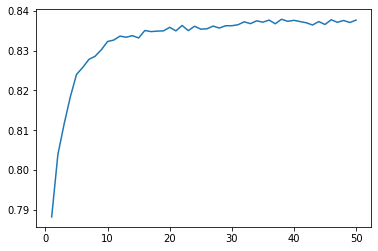

In [224]:
n = list(kScores.keys())           # pega as key do dict
scores = list(kScores.values())        # pega os valores do dict
plt.plot(n, scores) 

Vemos que, para os k entre 1 e 10, temos resultado muito diferentes, enquanto, para os k acima de 20, temos resultados muito próximos, não passando de uma diferença de 0.005 de acurácia. E, por conta do formato "logaritmico" do gráfico, é suposto que os resultado permaneceriam próximos para os k acima de 50 e que a diferença entre eles tenderia à 0. Por conta disso, há necessidade de testar para os k acima de 50, visto que não teria uma acurácia melhor o suficiente para justificar o gasto computacional.

## Predição com Base nos Dados de Teste

Para esse trabalho, foi nos dado apenas os dados das features para os dados de teste e temos que prever a label desse. Dessa forma, vamos dar os mesmos tratamentos que demos para os dados das features no conjunto de treino:

### Data Prep

In [225]:
testFeatures.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
Id,,,,,,,,,,,,,,
0,25,Private,120596,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,44,United-States
1,64,State-gov,152537,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
2,31,Private,100135,Masters,14,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States
3,45,Private,189123,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States
4,64,Self-emp-inc,487751,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States


#### Dados Faltantes

In [226]:
testFeatures.isnull().sum()/len(testFeatures.index) # quantidade de dados faltantes

age               0.000000
workclass         0.059152
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        0.059337
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    0.016830
dtype: float64

In [227]:
#inputa a mediana que obtemos no conjunto de treino nos dados faltantes
testFeatures['workclass'] = testFeatures['workclass'].fillna(workclassMode) 
testFeatures['occupation'] = testFeatures['occupation'].fillna(occupationMode) 
testFeatures['native.country'] = testFeatures['native.country'].fillna(nativeMode) 

#### Remoção de Variáveis

In [228]:
#removendo as mesmas removidas no dataset de treino
testFeatures = testFeatures.drop('capital.loss', axis=1)
testFeatures = testFeatures.drop('capital.gain', axis=1)
testFeatures = testFeatures.drop('education', axis=1)
testFeatures = testFeatures.drop('fnlwgt', axis=1)
testFeatures.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country
Id,,,,,,,,,,
0,25,Private,13,Never-married,Prof-specialty,Not-in-family,White,Male,44,United-States
1,64,State-gov,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States
2,31,Private,14,Divorced,Exec-managerial,Not-in-family,White,Female,40,United-States
3,45,Private,9,Never-married,Machine-op-inspct,Own-child,White,Male,40,United-States
4,64,Self-emp-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States


#### Transformação em Binário

In [229]:
i = 0
for country in testFeatures["native.country"]:
    
    if(country == 'United-States'):  testFeatures.iloc[i, testFeatures.columns.get_loc("native.country")] = 1
    else: testFeatures.iloc[i, testFeatures.columns.get_loc("native.country")] = 0
  
    i += 1

testFeatures.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country
Id,,,,,,,,,,
0,25,Private,13,Never-married,Prof-specialty,Not-in-family,White,Male,44,1
1,64,State-gov,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,1
2,31,Private,14,Divorced,Exec-managerial,Not-in-family,White,Female,40,1
3,45,Private,9,Never-married,Machine-op-inspct,Own-child,White,Male,40,1
4,64,Self-emp-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,1


In [230]:
i = 0
for race in testFeatures["race"]:
    
    if(race == 'White'):  testFeatures.iloc[i, testFeatures.columns.get_loc("race")] = 1
    else: testFeatures.iloc[i, testFeatures.columns.get_loc("race")] = 0
  
    i += 1

testFeatures.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country
Id,,,,,,,,,,
0,25,Private,13,Never-married,Prof-specialty,Not-in-family,1,Male,44,1
1,64,State-gov,13,Married-civ-spouse,Exec-managerial,Husband,1,Male,45,1
2,31,Private,14,Divorced,Exec-managerial,Not-in-family,1,Female,40,1
3,45,Private,9,Never-married,Machine-op-inspct,Own-child,1,Male,40,1
4,64,Self-emp-inc,13,Married-civ-spouse,Exec-managerial,Husband,1,Male,50,1


#### One-Hot Encoding

In [231]:
testFeatures['workclass'] = testFeatures['workclass'].astype('str')
testFeatures['marital.status'] = testFeatures['marital.status'].astype('str')
testFeatures['occupation'] = testFeatures['occupation'].astype('str')
testFeatures['relationship'] = testFeatures['relationship'].astype('str')
testFeatures['sex'] = testFeatures['sex'].astype('str')

In [232]:
one_hot_encoded_data = pd.get_dummies(testFeatures, columns = ['workclass','marital.status','occupation','relationship','sex'])
testFeatures = one_hot_encoded_data

#### Z-Score

In [233]:
test_z_scaled = testFeatures[['age','education.num', 'hours.per.week']] 
for column in test_z_scaled.columns: 
    test_z_scaled[column] = (test_z_scaled[column] -
                          test_z_scaled[column].median()) / test_z_scaled[column].std() 
    
testFeatures['age'] = test_z_scaled['age']
testFeatures['education.num'] = test_z_scaled['education.num']
testFeatures['hours.per.week'] = test_z_scaled['hours.per.week']
testFeatures.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,age,education.num,race,hours.per.week,native.country,"workclass_<bound method Series.mode of Id\n16280 Private\n16281 Local-gov\n16282 Private\n16283 Private\n16284 Self-emp-inc\n ... \n48835 Private\n48836 Private\n48837 Private\n48838 Private\n48839 Local-gov\nName: workclass, Length: 32536, dtype: object>",workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,sex_Female,sex_Male
Id,,,,,,,,,,,,,,,,,,,,,
0,-0.866477,1.168447,1,0.32052,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,1.949572,1.168447,1,0.40065,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,-0.433238,1.557929,1,0.00000,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0.577651,-0.389482,1,0.00000,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,1.949572,1.168447,1,0.80130,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


### Knn

In [234]:
knn = KNeighborsClassifier(n_neighbors=melhorK) # knn utilizando o melhor k que achamos

In [235]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=38)

In [236]:
YtestPred = knn.predict(testFeatures) # predição para a label

In [237]:
print(YtestPred)

[0 1 0 ... 0 0 1]


In [238]:
# a probabilidade estimada para os dados de teste, bom para vermos o quão provavel
# era a Label assumir cada valor. 
knn.predict_proba(testFeatures) 

array([[0.89473684, 0.10526316],
       [0.15789474, 0.84210526],
       [0.57894737, 0.42105263],
       ...,
       [1.        , 0.        ],
       [0.71052632, 0.28947368],
       [0.39473684, 0.60526316]])

Podemos ver que algumas observações possuem uma probabilidade grande de assumir o seu valor que foi rotulado, como a primeira observação. Enquanto outras tinham uma probabilidade beirando a ser classificada como outra, como vemos na terceira.

In [239]:
testSampleLabel.head()

,income
Id,
0,>50K
1,<=50K
2,>50K
3,>50K
4,<=50K


Vamos apenas tranformar a predição para o mesmo formato de sample_submission.csv:

In [240]:
YPred = {'income': YtestPred}

YPred = pd.DataFrame(data=YPred)

In [241]:
YPred.index.name = 'Id'
YPred.head()

,income
Id,
0,0
1,1
2,0
3,0
4,1


In [242]:
i = 0
for income in YPred["income"]:
    
    if(income == 1):  YPred.iloc[i, YPred.columns.get_loc("income")] = '>50K'
    else: YPred.iloc[i, YPred.columns.get_loc("income")] = '<=50K'
  
    i += 1

YPred.head()

,income
Id,
0,<=50K
1,>50K
2,<=50K
3,<=50K
4,>50K


In [247]:
YPred.to_csv('submission.csv')